# T - Test In Hypothesis Testing

A t-test and a z-test are both statistical tests used to compare the means of two groups. 
However, there are some key differences between the two.

- The t-test is used when the `sample size is small (less than 30) or when the population standard deviation is unknown`. 
It makes use of the t-distribution, which is a probability distribution that is similar to 
the standard normal distribution (z-distribution) but has heavier tails.

- The z-test, on the other hand, is used when the sample size is large or when the population standard 
deviation is known. It makes use of the standard normal distribution (z-distribution).

- The `test statistic for t-test is calculated using sample mean, sample standard deviation and sample size.` 
On the other hand, the `test statistic for z-test is calculated using population mean, population standard 
deviation and sample size.`

- P-values and critical values also differ between t-test and z-test. `P-value for t-test is calculated from 
t-distribution table` whereas for z-test it is calculated from z-distribution table. And Critical values also 
differs accordingly.

In summary, t-test is more flexible but less powerful than the z-test. When in doubt, it's safer to use a t-test.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, t # t for t-distribution
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

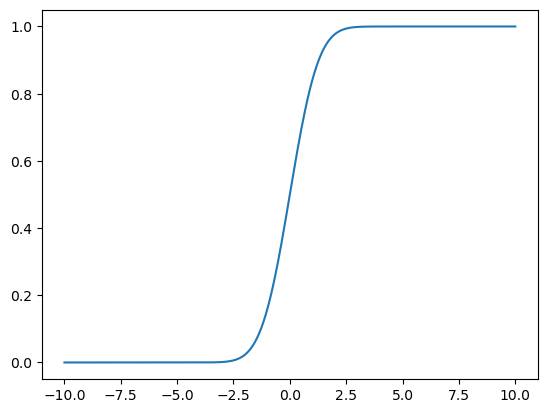

In [3]:
x_values = np.linspace(-10,10,1000)
y_values_z = norm.cdf(x_values) # for z-distribution
plt.plot(x_values, y_values_z) 

In a normal distribution, approx 99.7% of the data falls within three standard deviations of the mean.

As you can see, most of the values are between -2.5 and 2.5

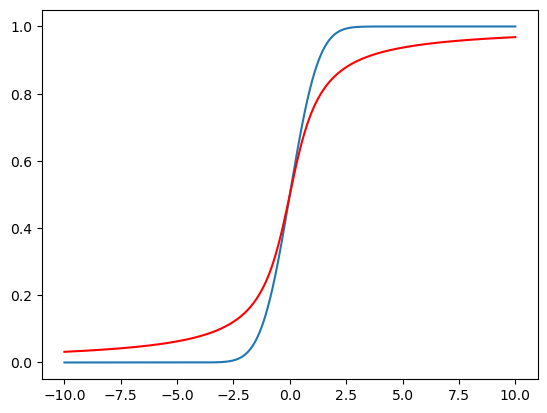

In [4]:
x_values = np.linspace(-10,10,1000)
y_values_z = norm.cdf(x_values)
plt.plot(x_values, y_values_z) # for z-distribution

y_values_t = t.cdf(x_values, df = 1) # for t-distribution
plt.plot(x_values, y_values_t, c = 'r')

Increasing degree of freedom will make the two curves come close. 

z-value and t-value will become more and more same.

Beyond df of 30, difference between the curves will become very negligible.

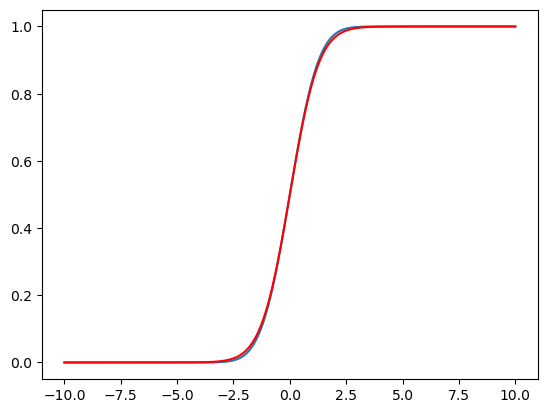

In [5]:
x_values = np.linspace(-10,10,1000)
y_values_z = norm.cdf(x_values)
plt.plot(x_values, y_values_z) # for z-distribution

y_values_t = t.cdf(x_values, df = 15) # for t-distribution
plt.plot(x_values, y_values_t, c = 'r')

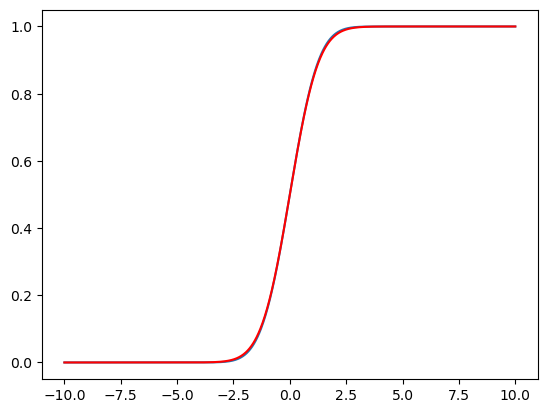

In [6]:
x_values = np.linspace(-10,10,1000)
y_values_z = norm.cdf(x_values)
plt.plot(x_values, y_values_z) # for z-distribution

y_values_t = t.cdf(x_values, df = 30) # for t-distribution
plt.plot(x_values, y_values_t, c = 'r')

### IQ Improvement with Pill

In [7]:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [8]:
np.mean(iq_scores)

103.5

In [9]:
# 100 is population mean.
# Test Statistic: sample mean(iq_scores) i.e. sample mean.
# H0: mu = 100 # default assumption. 
# Ha: mu > 100 
alpha = 0.01
test_statistic, p_value = ttest_1samp(iq_scores, 100, alternative="greater") # 100 is the mean with which you want to compare it.
print(test_statistic) # this test statistic is the z-score.
print(p_value)
if p_value < alpha:
    print('reject H0')
else:
    print('Fail to reject H0')

1.5071573172061195
0.08774972467925055
Fail to reject H0


Hence, not Convincing at the 99% confidence.

### Two Drugs

In [10]:
d1 = pd.read_csv("drug_1_recovery.csv")
d1.head(3)

,drug_1
0,8.824208
1,7.477745
2,7.557121


In [11]:
d2 = pd.read_csv("drug_2_recovery.csv")
d2.head(3)

,drug_2
0,9.565974
1,7.492915
2,8.738418


In [12]:
len(d1) # injected to 100 people

100

In [13]:
len(d2)

120

In [14]:
d1.mean()

drug_1    7.104917
dtype: float64

In [15]:
d2.mean()

drug_2    8.073423
dtype: float64

As a statistician, you figure out whether drug 1 is better than drug 2 or if the're the same.

Let's tackle all scenarios:

Case 1:<br>
H0: mu1 = mu2 <br>
Ha: mu1 < mu2

In [16]:
test_statistic, p_value = ttest_ind(d1, d2, alternative="less") # alt less due to mu1 < mu2
alpha = 0.01
print(test_statistic)
print(p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

[-5.32112438]
[1.27713574e-07]
Reject H0


This means that the two drugs have a statistically significant difference.

Case 2:<br>
H0: mu1 = mu2 <br>
Ha: mu1 > mu2

In [19]:
test_statistic, p_value = ttest_ind(d1, d2, alternative = "greater")
alpha = 0.01
print(test_statistic)
print(p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

[-5.32112438]
[0.99999987]
Failed to reject H0


Case 3:<br>
H0: mu1 = mu2 <br>
Ha: mu1 != mu2

In [22]:
test_statistic, p_value = ttest_ind(d1,d2, alternative = "two-sided") # default alt is two-sided.
alpha = 0.01
print(test_statistic)
print(p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

[-5.32112438]
[2.55427147e-07]
Reject H0


Since mu1 is not equal to mu2 as proved above.

 In general, you should go for two-sided, but if you're really inclided towards it, 
    you can take less or greater in the first place too

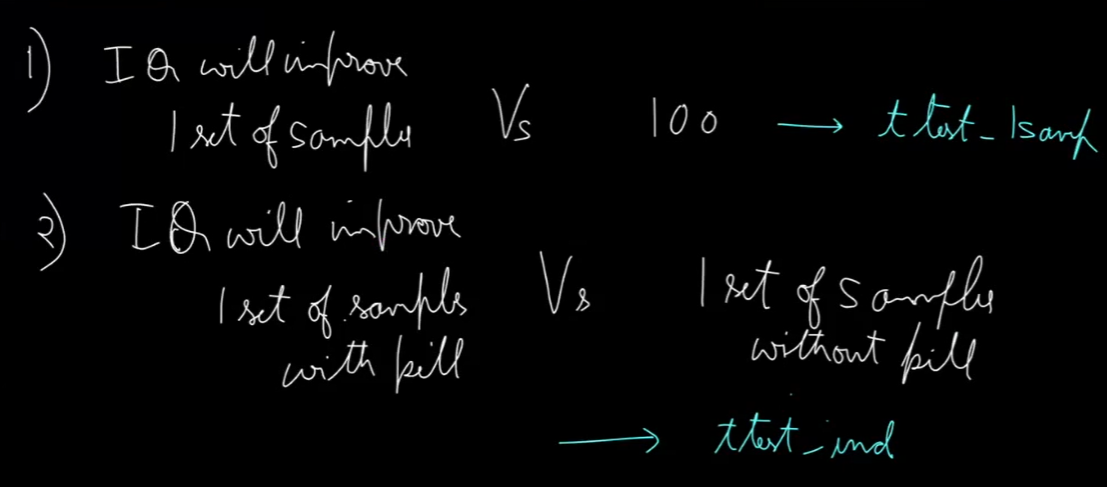

### Sachin data

Earlier we saw if the scoring patterns in the first and second innings
are different. <br>
Similarly, we checked for winning and defeat using z-test.
<br><br>
In the last class, we compared a mean with a single number. <br>
Now, we can compare two means.

In [26]:
df = pd.read_csv("Sachin_ODI.csv")

In [27]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


### First vs Second Innings

In [29]:
df.groupby(['Inns'])['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

Is the difference statistically significant or 
is it just a chance?

In [31]:
df_first_innings = df[df['Inns'] == 1]
df_second_innings = df[df['Inns'] == 2]

In [34]:
# H0: first = second innings
# Ha: first != second
test_statistic, p_value = ttest_ind(df_first_innings['runs'], df_second_innings['runs'])
alpha = 0.05
print(test_statistic)
print(p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

1.4612016295532178
0.14483724194759962
Failed to reject H0


In [36]:
# H0: first = second innings
# Ha: first > second
test_statistic, p_value = ttest_ind(df_first_innings['runs'], df_second_innings['runs'], alternative = 'greater')
alpha = 0.05
print(test_statistic)
print(p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

1.4612016295532178
0.07241862097379981
Failed to reject H0


In [37]:
# H0: first = second innings
# Ha: first < second innings
test_statistic, p_value = ttest_ind(df_first_innings['runs'], df_second_innings['runs'], alternative = "less")
alpha = 0.05
print(test_statistic)
print(p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

1.4612016295532178
0.9275813790262002
Failed to reject H0


Hence, the difference is not statistically significant.

### Won Vs Lost

In [41]:
df.groupby(['Won'])['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [42]:
df_won = df[df['Won'] == True]
df_lost = df[df['Won'] == False]

In [43]:
# H0: same scoring pattern
# Ha: different scoring pattern (2-tailed)
ttest_ind(df_won['runs'], df_lost['runs'], alternative = 'two-sided')
# Reject H

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00032706154973653116)

In [44]:
# H0: Same scoring pattern
# Ha: better scoring in victory
ttest_ind(df_won['runs'], df_lost['runs'], alternative = 'greater')
# Reject H0

Ttest_indResult(statistic=3.628068563969343, pvalue=0.00016353077486826558)

In [45]:
# H0: Same scoring pattern
# Ha: worse scoring in victory
ttest_ind(df_won['runs'], df_lost['runs'], alternative = 'less')
# Failed to reject H0

Ttest_indResult(statistic=3.628068563969343, pvalue=0.9998364692251317)

Hence, it can't go with the alternate hypothesis. 
<br>Either the data is sufficient or the setup is wrong.

### Problems

Q1. The average number of customers entering a store every day is 500 
with a standard dev. of 125.

A marketing company claims to increase this number.
After 70 days, it is seen that the average is 530.
Test the claim of the marketing company at a 95% confidence (or 5% significance)

In [48]:
# H0: mu = 500
# Ha: mu > 500
# Test statistic: sample mean
# Right tailed

alpha = 0.05

z_stat = (530 - 500) / (125 / np.sqrt(70))
p_value = 1 - norm.cdf(z_stat)
if p_value < alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

Reject H0


This means that the marketing company increased the number of customers.

Q2. A local football game sees 3.5 goals per match on avg., with standard deviation of 0.7.
A sample of 45 matches was taken.

What should be the maximum average goal of these 45 matches
such that we can continue to believe the statement that the population average is 3.5 goals, 
at a 10% confidence.

In [ ]:
# H0: mu = 3.5
# Ha: mu > 3.5 ## Since We want the critical value.

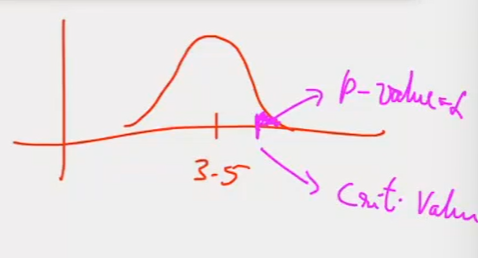

In [50]:
z_critical = norm.ppf(0.9)
x = 3.5 + z_critical * (0.7/np.sqrt(45))
print(x)

3.633729699470687


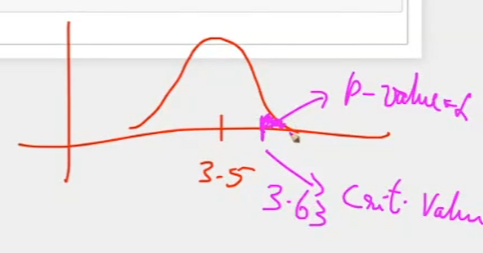

3.63 is the critical value. <br>
Anything above 3.63 has a p-value less than .01<br>
Anything less than 3.63 has a p-value greater than .01

Q3. The number of hours a student spends solving assessment problems across two batches are known. 
Test if one batch takes lesser time.

In [51]:
batch_1 = pd.Series([25,30,45,49,47,35,32,42])
batch_2 = pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

# H0: mu1 = mu2
# Ha: mu1 != mu2

t_stat, p_value = ttest_ind(batch_1, batch_2, alternative = 'two-sided')
print("Test Statistic: ", t_stat)
print("P-value: ", p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Test Statistic:  0.5795450171026676
P-value:  0.5694047618891788
Fail to reject H0


If you have any questions, connect with me here: https://www.linkedin.com/in/khushalkumar/